# Wastewater Influenza State and Territory Trends Export Tool

Write a script that throws together a csv of the state level data with columns time_value, lowercase state code geo_value, and one /several of the signals e.g. state_med_conc, or activity_level.

In [1]:
from datetime import datetime as dt
from urllib.request import urlopen
import pandas as pd
import numpy as np
import json

In [8]:
# Pull JSON from Trend Over Time link on CDC web page below
# https://www.cdc.gov/nwss/rv/InfluenzaA-statetrend.html
response = urlopen('https://www.cdc.gov/wcms/vizdata/NCEZID_DIDRI/FluA/FluAStateLevel.json')
json_data = response.read()
json_data = json.loads(json_data)
df = pd.json_normalize(json_data)

# date_period is literally just duplicated data filtered by 1 year, 9 Months, 45 Days, or all data avaliable
df = df[df['date_period'] == 'All Results']
df.activity_level = df.activity_level.replace('No Data', np.nan)

# State abbreviation crosswalk
df_states = pd.read_csv('./data/states.csv')
df_states.Abbreviation = df_states.Abbreviation.str.lower()
df_states

df = pd.merge(df, df_states, on=['State'])
df.rename(columns={'Abbreviation': 'geo_value', 'date': 'time_value'}, inplace=True)

# convert values for graphs below
df.time_value = pd.to_datetime(df.time_value)
df.value = df.value.astype(np.float64)
df.activity_level = df.activity_level.astype(np.float64)
df.region_value = df.region_value.astype(np.float64)
df.national_value = df.national_value.astype(np.float64)

df = df[['time_value', 'geo_value', 'value', 'activity_level', 'region_value', 'national_value']]
file_name = f'./data/nwss_influenza_{dt.today().strftime("%Y%m%d")}.csv'
df.to_csv(file_name, index=False)
df

,time_value,geo_value,value,activity_level,region_value,national_value
0,2023-05-06,al,1.203003,2.0,1.498678,1.442839
1,2023-01-14,al,3.373750,4.0,3.954089,4.904807
2,2022-11-19,al,20.304327,9.0,12.465784,12.228303
3,2024-06-29,al,1.762753,3.0,1.237850,1.470436
4,2023-12-16,al,11.729076,6.0,8.155772,7.436423
...,...,...,...,...,...,...
4555,2024-04-13,wy,1.000000,2.0,3.293373,3.366999
4556,2024-05-18,wy,1.000000,2.0,3.914910,2.372593
4557,2024-03-02,wy,2.632752,3.0,3.904621,6.503886
4558,2023-12-09,wy,1.717039,3.0,10.053410,5.354301


## Quick sanity check graphs

<Axes: xlabel='time_value', ylabel='national_value'>

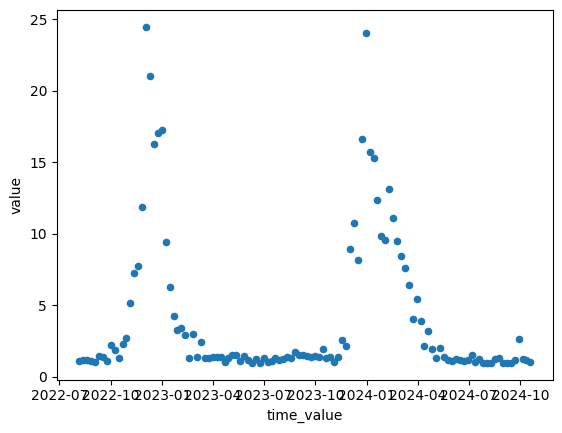

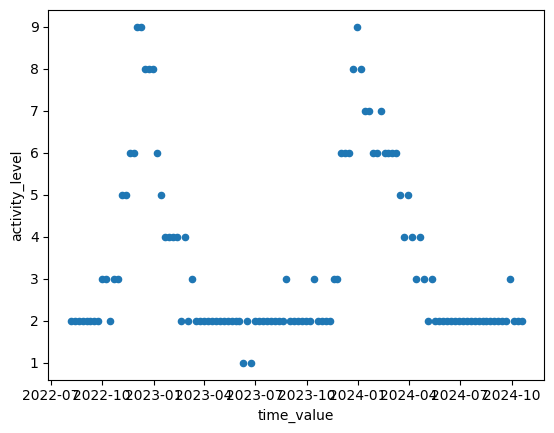

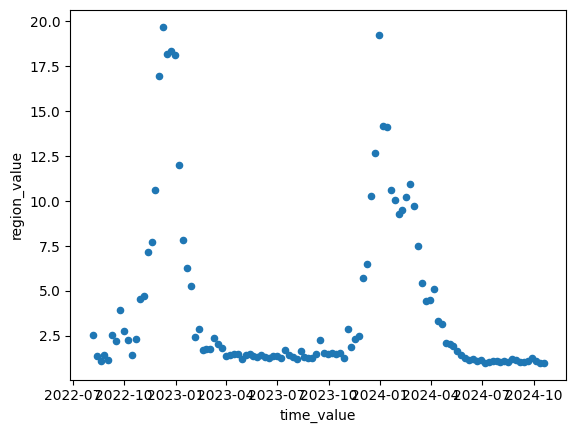

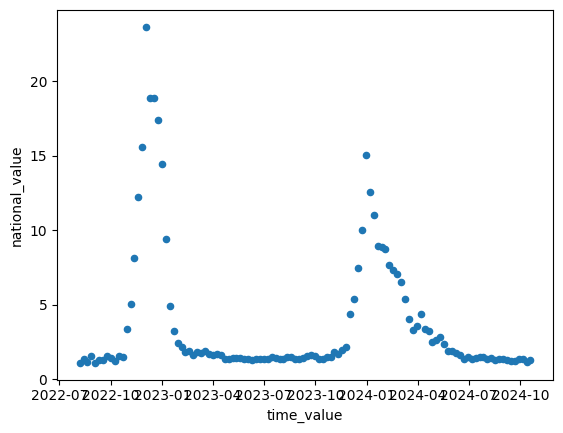

In [9]:
df[df['geo_value']=='pa'].plot(x='time_value', y='value', kind='scatter')
df[df['geo_value']=='pa'].plot(x='time_value', y='activity_level', kind='scatter')
df[df['geo_value']=='pa'].plot(x='time_value', y='region_value', kind='scatter')
df[df['geo_value']=='pa'].plot(x='time_value', y='national_value', kind='scatter')

In [148]:
df.shape[0]

6974